In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

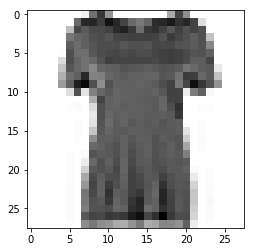

0


((28, 28), ())

In [4]:
exampleindex = 10
fashionimage = x_train[exampleindex]
fashionlabel = y_train[exampleindex]

plt.imshow(fashionimage, cmap=plt.cm.binary)
plt.show()
print(fashionlabel)
fashionimage.shape, fashionlabel.shape

In [5]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
x_train.shape, x_test.shape
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, input_shape=(28*28,)))
model.add(keras.layers.Dense(25))
model.add(keras.layers.Dense(10))
model.add(keras.layers.Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 40,796
Trainable params: 40,796
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [8]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=500)

Epoch 1/5
60000/60000 [==============================] - 1s 11us/step - loss: -55.0422
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.7983
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: -55.7983
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.7983
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.7983


In [9]:
preds = model.predict(x_test)
preds.shape

(10000, 1)

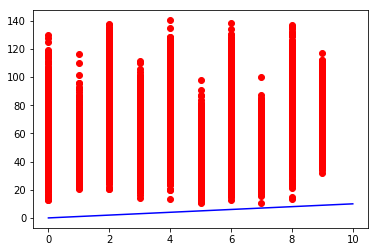

In [10]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

## Regularisation

In [16]:
model_r = keras.models.Sequential()
model_r.add(keras.layers.Dense(50, activation='relu', \
                               kernel_regularizer=keras.regularizers.l2(0.1), input_shape=(28*28,)))
model_r.add(keras.layers.Dense(25))
model_r.add(keras.layers.Dense(10))
model_r.add(keras.layers.Dense(1))
model_r.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 40,796
Trainable params: 40,796
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_r.compile(optimizer='sgd', loss='binary_crossentropy')

In [18]:
hist_r = model_r.fit(x_train, y_train, epochs=5, batch_size=500)

Epoch 1/5
60000/60000 [==============================] - 1s 12us/step - loss: -46.6094
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: -50.4930
Epoch 3/5
60000/60000 [==============================] - 1s 10us/step - loss: -52.5170
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: -53.7689
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: -54.5432


In [19]:
preds_r = model_r.predict(x_test)
preds_r.shape

(10000, 1)

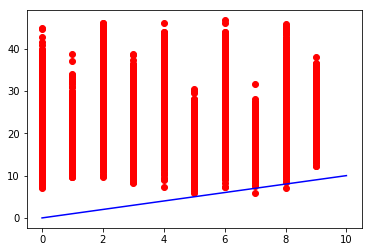

In [20]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds_r, 'ro')
plt.plot([0,10], [0,10], 'b')

## Dropout

In [21]:
model_d = keras.models.Sequential()
model_d.add(keras.layers.Dense(50, activation='relu', input_shape=(28*28,)))
keras.layers.Dropout(0.3)
model_d.add(keras.layers.Dense(25, activation='relu'))
model_d.add(keras.layers.Dense(10))
model_d.add(keras.layers.Dense(1))
model_d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_14 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 40,796
Trainable params: 40,796
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_d.compile(optimizer='sgd', loss='binary_crossentropy')

In [23]:
hist_d = model_r.fit(x_train, y_train, epochs=5, batch_size=500)

Epoch 1/5
60000/60000 [==============================] - 1s 12us/step - loss: -55.0220
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.3182
Epoch 3/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.5014
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.6147
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: -55.6847


In [24]:
preds_d = model_r.predict(x_test)
preds_d.shape

(10000, 1)

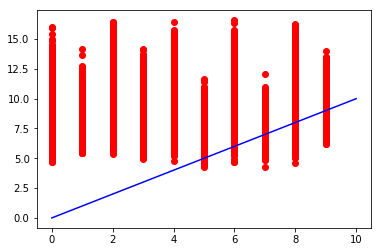

In [25]:
plt.plot(y_test, preds_d, 'ro')
plt.plot([0,10], [0,10], 'b')